<a href="https://colab.research.google.com/github/malzate10/mental-Ataraxia/blob/main/soccer_englad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
!pip install wget
import wget
print('READY')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=61ddf13e95585e90aa3f8ca8053d40a27740d7a6daaf993af6abf36263571297
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
READY


In [4]:
url='https://www.football-data.co.uk/mmz4281/1718/E0.csv'
wget.download(url, 'E0.csv')
print('Datos Descargados!')

Datos Descargados!


In [5]:
dato=pd.read_csv('./E0.csv')

In [6]:
dato.shape

(380, 65)

In [7]:
dato.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [8]:
dato.isnull().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
           ..
BbMxAHA     0
BbAvAHA     0
PSCH        0
PSCD        0
PSCA        0
Length: 65, dtype: int64

In [9]:
team_name = {}
index = 0
for idx, row in dato.iterrows():
    name = row['HomeTeam']
    if(name not in team_name.keys()):
        team_name[name] = index
        index += 1
    name = row['AwayTeam']
    if(name not in team_name.keys()):
        team_name[name] = index
        index += 1

team_name

{'Arsenal': 0,
 'Leicester': 1,
 'Brighton': 2,
 'Man City': 3,
 'Chelsea': 4,
 'Burnley': 5,
 'Crystal Palace': 6,
 'Huddersfield': 7,
 'Everton': 8,
 'Stoke': 9,
 'Southampton': 10,
 'Swansea': 11,
 'Watford': 12,
 'Liverpool': 13,
 'West Brom': 14,
 'Bournemouth': 15,
 'Man United': 16,
 'West Ham': 17,
 'Newcastle': 18,
 'Tottenham': 19}

In [10]:
# Total number of matches.
n_matches = dato.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dato.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dato[dato.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 380
Number of features: 64
Number of matches won by home team: 173
Win rate of home team: 45.53%


In [11]:
lb_make = LabelEncoder()
dato['categorical FTR'] = lb_make.fit_transform(dato['FTR'])

In [12]:
dato['FTR'].value_counts()

FTR
H    173
A    108
D     99
Name: count, dtype: int64

In [13]:
dato['categorical FTR'].value_counts()

categorical FTR
2    173
0    108
1     99
Name: count, dtype: int64

In [14]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
columns_name=['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']
X_all = dato[columns_name]
y_all = dato['categorical FTR']

In [15]:
y_all = to_categorical(y_all)

In [16]:
y_all[0:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [17]:
X_all.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
0,4,3,2,2,27,6,10,3
1,0,2,0,0,6,14,2,4
2,2,3,0,3,19,10,6,5
3,0,3,0,2,14,8,4,6
4,1,0,1,0,9,9,4,1


<ipython-input-18-4a8a73b7215f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_all[col], shade=True)
<ipython-input-18-4a8a73b7215f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_all[col], shade=True)
<ipython-input-18-4a8a73b7215f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_all[col], shade=True)
<ipython-input-18-4a8a73b7215f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_all[col], shade=True)
<ipython-input-18-4a8a73b7215f>:2: FutureWarning: 

`shade` is now deprecated in fav

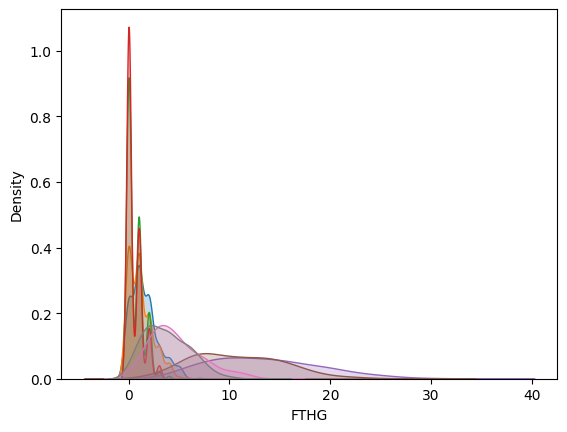

In [18]:
for col in X_all:
    sns.kdeplot(X_all[col], shade=True)

In [20]:
# fit on training data column
scale = StandardScaler().fit(X_all)

# transform the training data column
scaled_df= scale.transform(X_all)
X_allnorm= pd.DataFrame(scaled_df, columns=columns_name)
X_allnorm.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
0,1.844414,1.575043,1.756913,1.964501,2.325776,-1.001640,1.984099,-0.331312
1,-1.144402,0.724878,-0.767196,-0.682699,-1.316236,0.647865,-0.971149,0.101329
2,0.350006,1.575043,-0.767196,3.288101,0.938343,-0.176888,0.506475,0.533969
3,-1.144402,1.575043,-0.767196,1.964501,0.071197,-0.589264,-0.232337,0.966610
4,-0.397198,-0.975453,0.494858,-0.682699,-0.795949,-0.383076,-0.232337,-1.196593


In [21]:
# fit scaler on training data
scale_2 = MinMaxScaler().fit(X_all)

# transform training data
scale_df_normalize = scale_2.transform(X_all)
X_allnorm_norma= pd.DataFrame(scale_df_normalize, columns=columns_name)
X_allnorm_norma.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
0,0.571429,0.500000,0.50,0.666667,0.757576,0.200000,0.666667,0.214286
1,0.000000,0.333333,0.00,0.000000,0.121212,0.466667,0.133333,0.285714
2,0.285714,0.500000,0.00,1.000000,0.515152,0.333333,0.400000,0.357143
3,0.000000,0.500000,0.00,0.666667,0.363636,0.266667,0.266667,0.428571
4,0.142857,0.000000,0.25,0.000000,0.212121,0.300000,0.266667,0.071429


<ipython-input-22-4e6131e13992>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm[col], shade=True)
<ipython-input-22-4e6131e13992>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm[col], shade=True)
<ipython-input-22-4e6131e13992>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm[col], shade=True)
<ipython-input-22-4e6131e13992>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm[col], shade=True)
<ipython-input-22-4e6131e13992>:3: FutureWarning: 

`shade` is now d

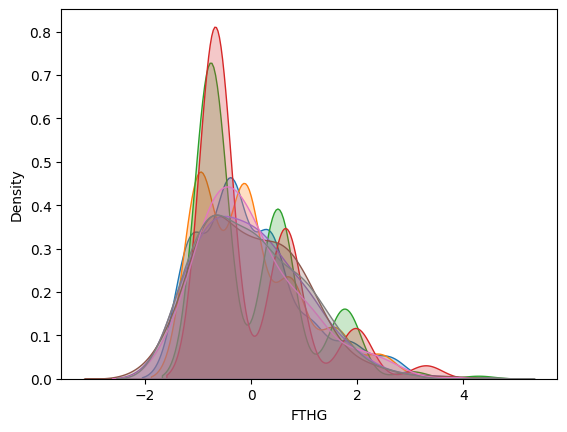

In [22]:
#Standardize
for col in X_allnorm:
    sns.kdeplot(X_allnorm[col], shade=True)

<ipython-input-23-d50d0def5cab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm_norma[col], shade=True)
<ipython-input-23-d50d0def5cab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm_norma[col], shade=True)
<ipython-input-23-d50d0def5cab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm_norma[col], shade=True)
<ipython-input-23-d50d0def5cab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_allnorm_norma[col], shade=True)
<ipython-input-23-d50d0def5cab>:3: FutureWar

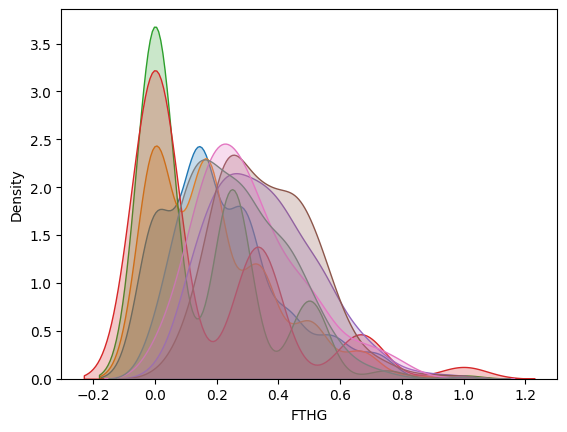

In [23]:
#Normalize
for col in X_allnorm_norma:
    sns.kdeplot(X_allnorm_norma[col], shade=True)

In [24]:
#Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split( X_allnorm_norma, y_all, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (266, 8) (266, 3)
Test set: (114, 8) (114, 3)


In [25]:
n_cols = X_all.shape[1] # Numero de predictores
print('El numero de predictores es:',n_cols)

El numero de predictores es: 8


In [26]:
#Definición del Modelo
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    #model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# build the model
model = regression_model()

In [28]:
epochs=100
# fit the model
model_fit=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, verbose=2)

Epoch 1/100
9/9 - 1s - loss: 1.1018 - accuracy: 0.2481 - val_loss: 1.1010 - val_accuracy: 0.1930 - 1s/epoch - 165ms/step
Epoch 2/100
9/9 - 0s - loss: 1.0893 - accuracy: 0.3158 - val_loss: 1.0948 - val_accuracy: 0.3421 - 71ms/epoch - 8ms/step
Epoch 3/100
9/9 - 0s - loss: 1.0818 - accuracy: 0.4323 - val_loss: 1.0906 - val_accuracy: 0.3947 - 55ms/epoch - 6ms/step
Epoch 4/100
9/9 - 0s - loss: 1.0757 - accuracy: 0.4586 - val_loss: 1.0871 - val_accuracy: 0.4035 - 69ms/epoch - 8ms/step
Epoch 5/100
9/9 - 0s - loss: 1.0700 - accuracy: 0.4699 - val_loss: 1.0835 - val_accuracy: 0.4123 - 73ms/epoch - 8ms/step
Epoch 6/100
9/9 - 0s - loss: 1.0648 - accuracy: 0.4737 - val_loss: 1.0797 - val_accuracy: 0.4123 - 78ms/epoch - 9ms/step
Epoch 7/100
9/9 - 0s - loss: 1.0595 - accuracy: 0.4737 - val_loss: 1.0749 - val_accuracy: 0.4211 - 69ms/epoch - 8ms/step
Epoch 8/100
9/9 - 0s - loss: 1.0535 - accuracy: 0.4737 - val_loss: 1.0698 - val_accuracy: 0.4211 - 70ms/epoch - 8ms/step
Epoch 9/100
9/9 - 0s - loss: 1.0

In [29]:
model_history = pd.DataFrame(model_fit.history)
model_history['epoch'] = model_fit.epoch
model_history.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.047744,1.0,0.054492,1.0,95
96,0.045697,1.0,0.052378,1.0,96
97,0.043501,1.0,0.048897,1.0,97
98,0.041648,1.0,0.047523,1.0,98
99,0.039743,1.0,0.045023,1.0,99


In [31]:
def plot_fit(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Error')
  #plt.ylim([-5,5])
  plt.legend()

  plt.show()

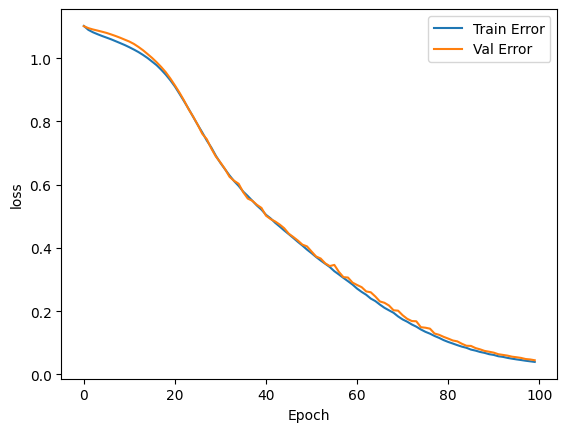

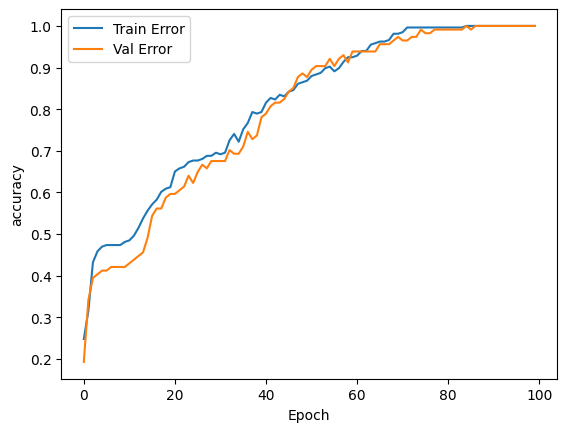

In [32]:
plot_fit(model_fit)

In [33]:
# evaluate the model
test1 = model.evaluate(X_test, y_test, verbose=0)

In [34]:
#the loss value in test is:
print('Test loss:', round(test1[0],3))
print('Test accuracy:', round(test1[1],3))

Test loss: 0.045
Test accuracy: 1.0


In [35]:
HT='Brighton'
AT='Liverpool'
dato1=dato.loc[(dato['HomeTeam']==HT) & (dato['AwayTeam']==AT)]
dato1.shape

(1, 66)

In [36]:
dato1

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,categorical FTR
141,E0,02/12/2017,Brighton,Liverpool,1,5,A,0,2,A,...,20,1.0,2.13,2.09,1.84,1.8,7.25,4.39,1.53,0


In [37]:
#Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all_2 = dato1[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']]
y_all_2 = dato1['categorical FTR']

In [38]:
X_all_2

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
141,1,5,0,2,6,12,2,6


In [39]:
#Convierte numero [0,1,2] en [Away, Draw, Home]
def actual_winner(yx):
    if (int(yx)==0):
      winner='Away'
    elif (int(yx)==1):
      winner='Draw'
    else:
      winner='Home'
    return winner

In [40]:
# model.predict puede dar un número muy pequeño, que debemos convertir
# en un numero "manejable"
def convert_number(pred):
  pred_=[]
  for i in range(len(pred[0])):
    pred_number=float(format(pred[0][i], '.3f'))
    pred_.append(pred_number)

  return (pred_)

In [41]:
# Transforma numero en carácter
# Recibe un número [0,1,2] y dice si es [Away, Draw, Home]
def predicted_winner(yx):
  y=yx.index(max(yx))
  if y==0:
    pred_winner='Away'
  elif y==1:
    pred_winner='Draw'
  elif y==2:
    pred_winner='Home'
  return pred_winner

In [42]:
resultado_actual=actual_winner(y_all_2)

<ipython-input-39-90a987d4a770>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if (int(yx)==0):


In [43]:
y_all_2

141    0
Name: categorical FTR, dtype: int64

In [44]:
print('El resultado actual es: ', int(y_all_2),' Es decir: ',resultado_actual)

El resultado actual es:  0  Es decir:  Away


<ipython-input-44-9fdaecebdd7e>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El resultado actual es: ', int(y_all_2),' Es decir: ',resultado_actual)


In [45]:
X_allnorm = (X_all_2 - X_all.mean()) / X_all.std()
X_allnorm.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
141,-0.396675,3.27106,-0.766186,1.961914,-1.314503,0.235179,-0.96987,0.965337


In [46]:
pred1= model.predict(X_allnorm)
pred1

1/1 [==============================] - 0s 192ms/step


array([[1.0000000e+00, 3.2988185e-17, 1.4525912e-36]], dtype=float32)

In [47]:
pred1_number=convert_number(pred1)
pred1_number

[1.0, 0.0, 0.0]

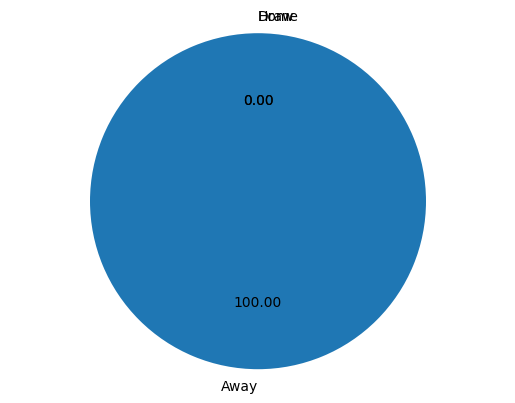

In [48]:
#PIE chart
pieLabels = 'Away', 'Draw', 'Home'
figureObject, axesObject = plt.subplots()
#Draw the pie chart
axesObject.pie(pred1_number, labels=pieLabels, autopct='%1.2f', startangle=90)
# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plt.show()

In [49]:
pred_winner1=predicted_winner(pred1_number)
pred_winner1

'Away'

In [51]:
print('The Actual Winner is: ', resultado_actual)
print('The Predicted Winner: ',pred_winner1)

The Actual Winner is:  Away
The Predicted Winner:  Away


In [52]:
url='https://www.football-data.co.uk/mmz4281/2324/E0.csv'
wget.download(url, 'E02.csv')
print('Datos Descargados!')

Datos Descargados!


In [53]:
dato3=pd.read_csv('./E02.csv')

In [54]:
dato3['categorical FTR'] = lb_make.fit_transform(dato3['FTR'])

In [55]:
dato3.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,categorical FTR
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95,0
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92,2
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91,1
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86,2
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88,0


In [56]:
dato3.shape

(380, 107)

In [57]:
HT='Brighton'
AT='Crystal Palace'
dato4=dato3.loc[(dato3['HomeTeam']==HT) & (dato3['AwayTeam']==AT)]
dato4.shape

(1, 107)

In [58]:
dato4

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,categorical FTR
219,E0,03/02/2024,15:00,Brighton,Crystal Palace,4,1,H,3,0,...,-0.75,1.95,1.98,1.95,1.97,1.97,1.99,1.9,1.96,2


In [59]:
#Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all_3 = dato4[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']]
y_all_3 = dato4['categorical FTR']

In [60]:
X_all_3

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
219,4,1,3,0,13,7,6,5


In [61]:
y_all_3_resultado=actual_winner(y_all_3)
print('El resultado actual es: ', int(y_all_3),' Es decir: ',y_all_3_resultado)

El resultado actual es:  2  Es decir:  Home


<ipython-input-39-90a987d4a770>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if (int(yx)==0):
<ipython-input-39-90a987d4a770>:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif (int(yx)==1):
<ipython-input-61-daa9615c0bd4>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El resultado actual es: ', int(y_all_3),' Es decir: ',y_all_3_resultado)


In [62]:
#normalizacion
X_allnorm2 = (X_all_3 - X_all.mean()) / X_all.std()
X_allnorm2.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
219,1.841985,-0.125123,3.014992,-0.6818,-0.102097,-0.794405,0.505808,0.533266


In [63]:
# Predict the target
pred2= model.predict(X_allnorm2)
pred2

1/1 [==============================] - 0s 20ms/step


array([[6.3882615e-14, 7.5895741e-11, 1.0000000e+00]], dtype=float32)

In [64]:
pred2_number=convert_number(pred2)
pred2_number

[0.0, 0.0, 1.0]

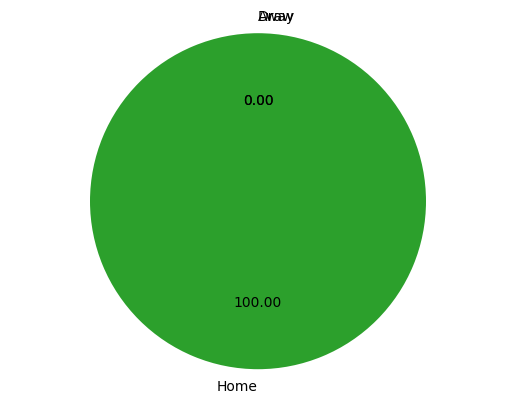

In [65]:
#PIE chart
pieLabels = 'Away', 'Draw', 'Home'
figureObject, axesObject = plt.subplots()
#Draw the pie chart
axesObject.pie(pred2_number, labels=pieLabels, autopct='%1.2f', startangle=90)
# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plt.show()

In [66]:
pred_winner2=predicted_winner(pred2_number)
pred_winner2

'Home'

In [67]:
print('The Actual Winner is: ', y_all_3_resultado)
print('The Predicted Winner: ', pred_winner2)

The Actual Winner is:  Home
The Predicted Winner:  Home


In [68]:
X_all_4 = dato3[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']]
y_all_4 = dato3['categorical FTR']

In [69]:
y_all_4[0:5]

0    0
1    2
2    1
3    2
4    0
Name: categorical FTR, dtype: int64

In [70]:
y_all_4_actual=[]
for i in range(len(y_all_4)):
  y=actual_winner(y_all_4[i])
  y_all_4_actual.append(y)

y_all_4_actual[0:5]

['Away', 'Home', 'Draw', 'Home', 'Away']

In [71]:
y_all_4_data=[]
for i in range(len(y_all_4)):
  y=actual_winner(y_all_4[i])
  y_all_4_data.append(y)

In [72]:
#normalizacion
X_allnorm3 = (X_all_4 - X_all.mean()) / X_all.std()
X_allnorm3.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST
0,-1.142895,1.572969,-0.766186,1.961914,-1.314503,1.264762,-1.338790,1.829479
1,0.349545,-0.125123,1.754600,-0.681800,0.244304,-1.000321,0.874728,-0.762946
2,-0.396675,-0.125123,-0.766186,-0.681800,0.071103,1.058845,0.136889,-0.330875
3,1.841985,-0.125123,0.494207,-0.681800,2.322714,-0.382571,2.719326,-0.330875
4,-1.142895,-0.125123,-0.766186,-0.681800,0.937107,-0.382571,1.612567,-0.762946


In [73]:
# Predict the target
pred3= model.predict(X_allnorm3)

12/12 [==============================] - 0s 6ms/step


In [74]:
pred3_data=[]
pred3_size=len(pred3)
for i in range(pred3_size):
  y=convert_number([pred3[i]])
  pred3_data.append(y)

pred3_data[0:5]

[[1.0, 0.0, 0.0],
 [0.0, 0.001, 0.999],
 [0.997, 0.003, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0]]

In [75]:
pred_winner3=[]
for i in range(len(pred3_data)):
  y=predicted_winner(pred3_data[i])
  pred_winner3.append(y)

pred_winner3[0:5]

['Away', 'Home', 'Away', 'Home', 'Away']

In [76]:
actual_count = pd.Series(y_all_4_actual).value_counts()
actual_count

Home    175
Away    123
Draw     82
Name: count, dtype: int64

In [77]:
pred_count = pd.Series(pred_winner3).value_counts()
pred_count

Away    202
Home    157
Draw     21
Name: count, dtype: int64

In [78]:
list_common = []
for a, b in zip(y_all_4_actual, pred_winner3):
    if a != b:
        list_common.append([a,b])

In [79]:
len(list_common)

97

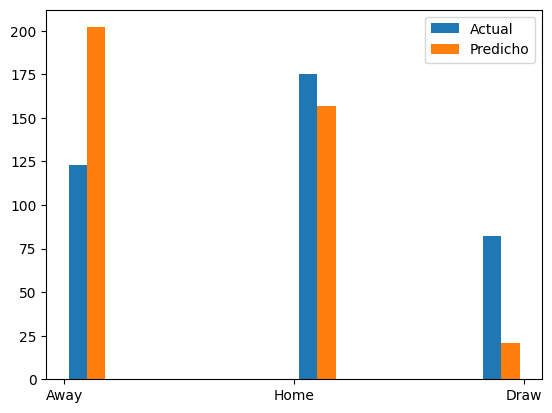

In [80]:
plt.hist([y_all_4_actual, pred_winner3], label=['Actual', 'Predicho'])
plt.legend(loc='upper right')
plt.show()